In [1]:
import pandas as pd
from google.colab import drive
import seaborn as sns

In [2]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
 result_df = (
     pd.read_csv("/content/drive/My Drive/Colab Notebooks/wmhn-result.csv")
     .assign(time = lambda x: pd.to_datetime(x.time, unit="s"))
     .assign(time = lambda x: x.time.dt.tz_localize("utc"))
     .assign(time = lambda x: x.time.dt.tz_convert("Europe/Berlin"))
 )

In [4]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194229 entries, 0 to 194228
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype                        
---  ------   --------------   -----                        
 0   loop     194229 non-null  int64                        
 1   time     194229 non-null  datetime64[ns, Europe/Berlin]
 2   channel  194229 non-null  int64                        
 3   signal   189229 non-null  float64                      
dtypes: datetime64[ns, Europe/Berlin](1), float64(1), int64(2)
memory usage: 5.9 MB


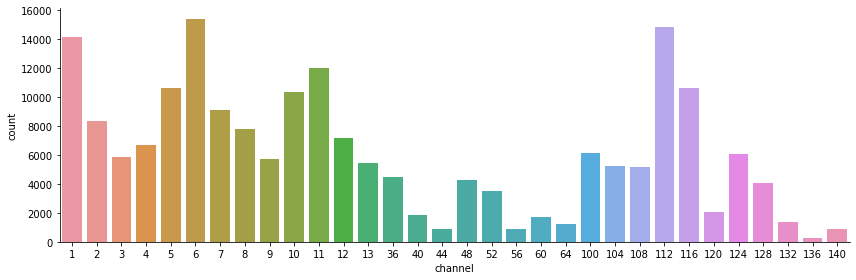

In [5]:
g = (
    result_df
    .pipe(
        (sns.catplot, "data"),
        x="channel",
        kind="count",
        height=4,
        aspect=3
    )
)

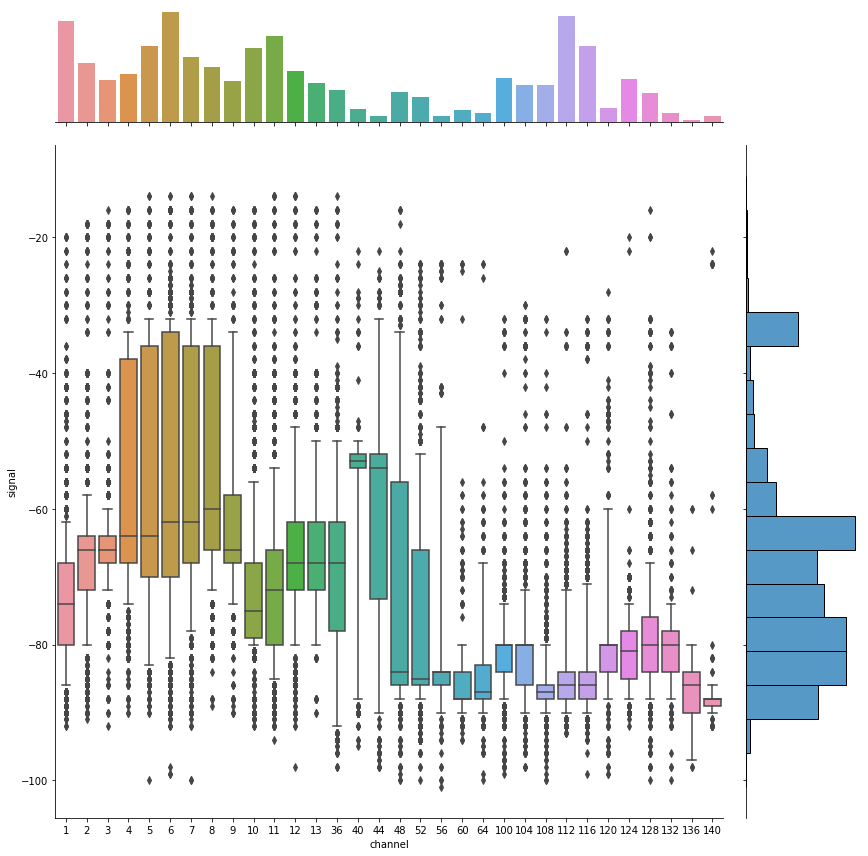

In [6]:
g = sns.JointGrid(
    data=result_df,
    x="channel",
    y="signal",
    height=12
)
sns.boxplot(
    data=result_df,
    x="channel", 
    y="signal",
    whis=[5,95],
    ax=g.ax_joint
)
sns.countplot(
    data=result_df,
    x="channel",
    ax=g.ax_marg_x
)
sns.histplot(
    data=result_df,
    y="signal",
    binwidth=5,
    ax=g.ax_marg_y
)

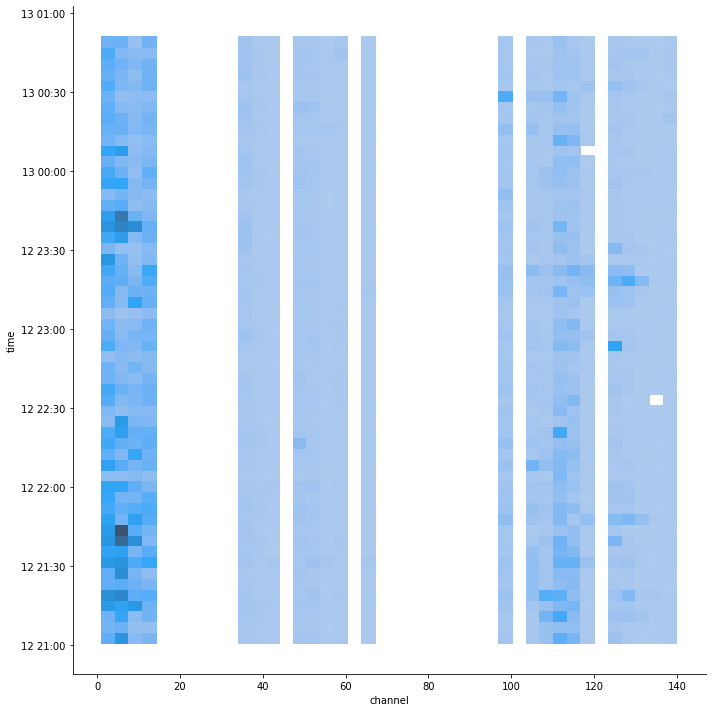

In [7]:
g = (
    result_df
    .pipe(
        (sns.displot, "data"),
        x="channel",
        y="time",
        height=10,
        aspect=1
    )
)

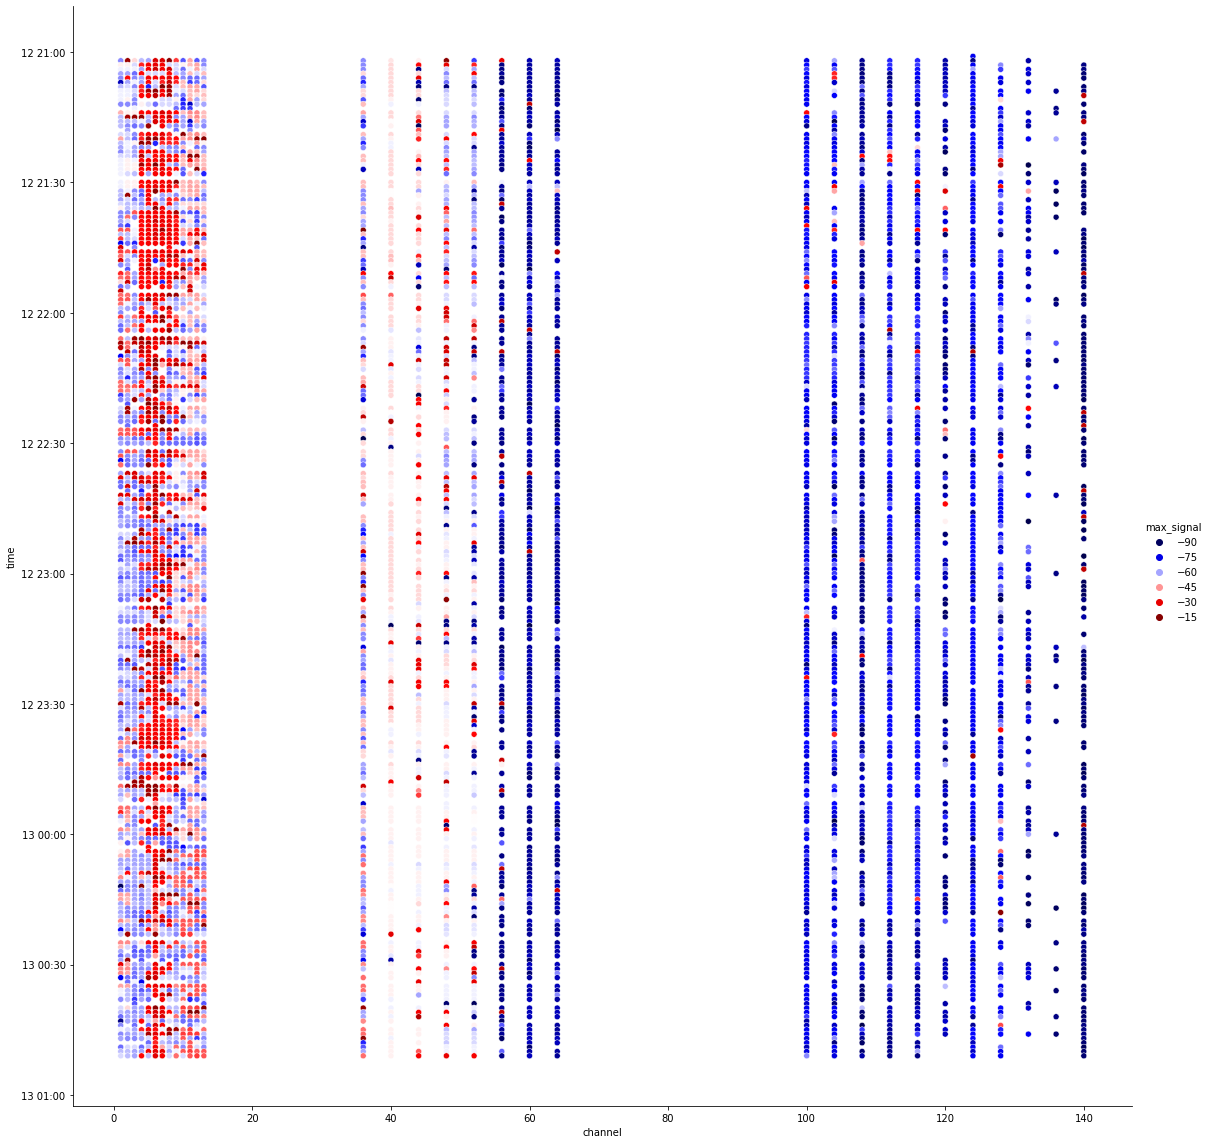

In [8]:
time_bins = pd.date_range(
    start=result_df.time.min()-pd.Timedelta("1min"), 
    end=result_df.time.max()+pd.Timedelta("1min"), 
    freq="1min"
)
time_labels = time_bins[:-1] + (time_bins[1:] - time_bins[:-1]) / 2

g = (
    result_df
    .assign(time = lambda x: pd.cut(x.time, time_bins, labels=time_labels))
    .groupby(["time", "channel"])
    .signal
    .max()
    .reset_index(name="max_signal")
    .pipe(
        (sns.relplot, "data"),
        x="channel",
        y="time",
        hue="max_signal",
        palette="seismic",
        height=16,
        aspect=1
    )
)

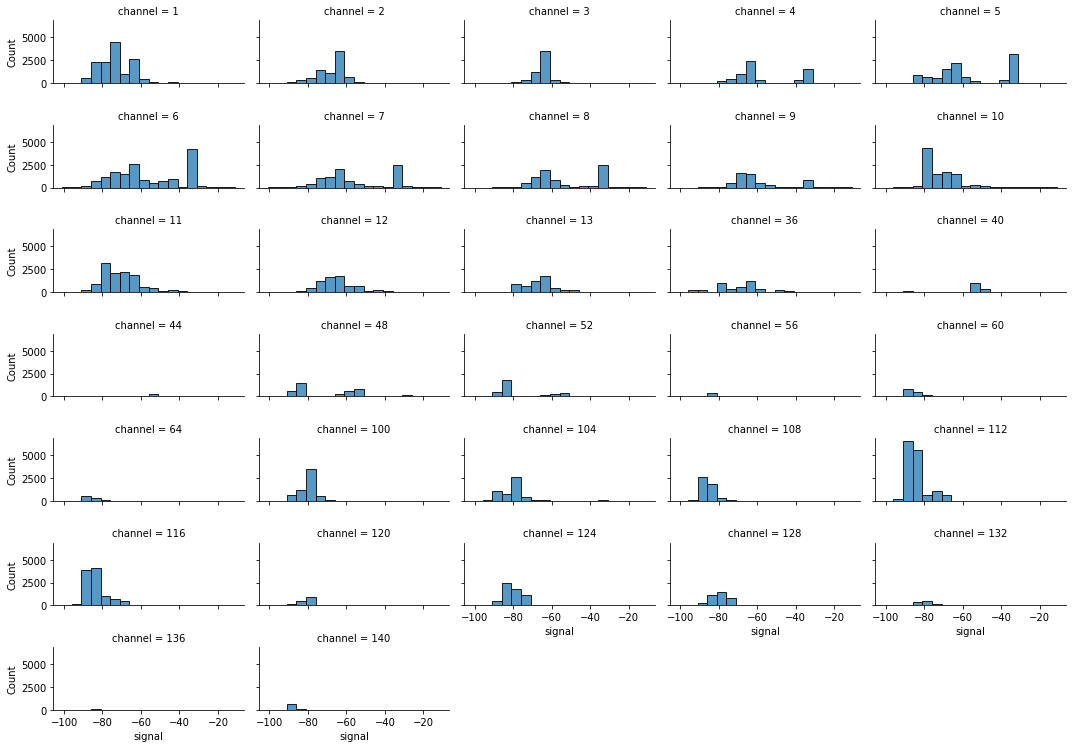

In [9]:
g = (
    result_df
    .pipe(
        (sns.displot, "data"),
        x="signal",
        binwidth=5,
        col="channel",
        col_wrap=5,
        height=1.5,
        aspect=2
    )
)